HEIGHT: 720
WIDTH: 1280
CHANNELS: 3


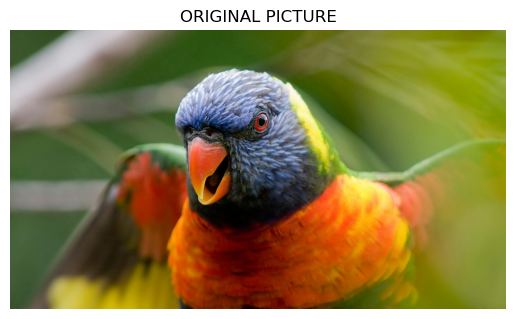

In [15]:
import cv2 as cv
import imutils
import sys
import numpy as np
import matplotlib.pyplot as plt

#read the image from the specified directory
img = cv.imread(cv.samples.findFile("../inframes/parrot.png"))

#check if the image has been loaded correctly
if img is None:
    sys.exit("Impossibile leggere l'immagine.")

#get information concerning image dimensions
height, width, n_ch = img.shape
print(f'HEIGHT: {height}\nWIDTH: {width}\nCHANNELS: {n_ch}')

#display image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('ORIGINAL PICTURE')
plt.axis('off')
plt.show()

# Contrast Enhancement Module

### Histogram Computation

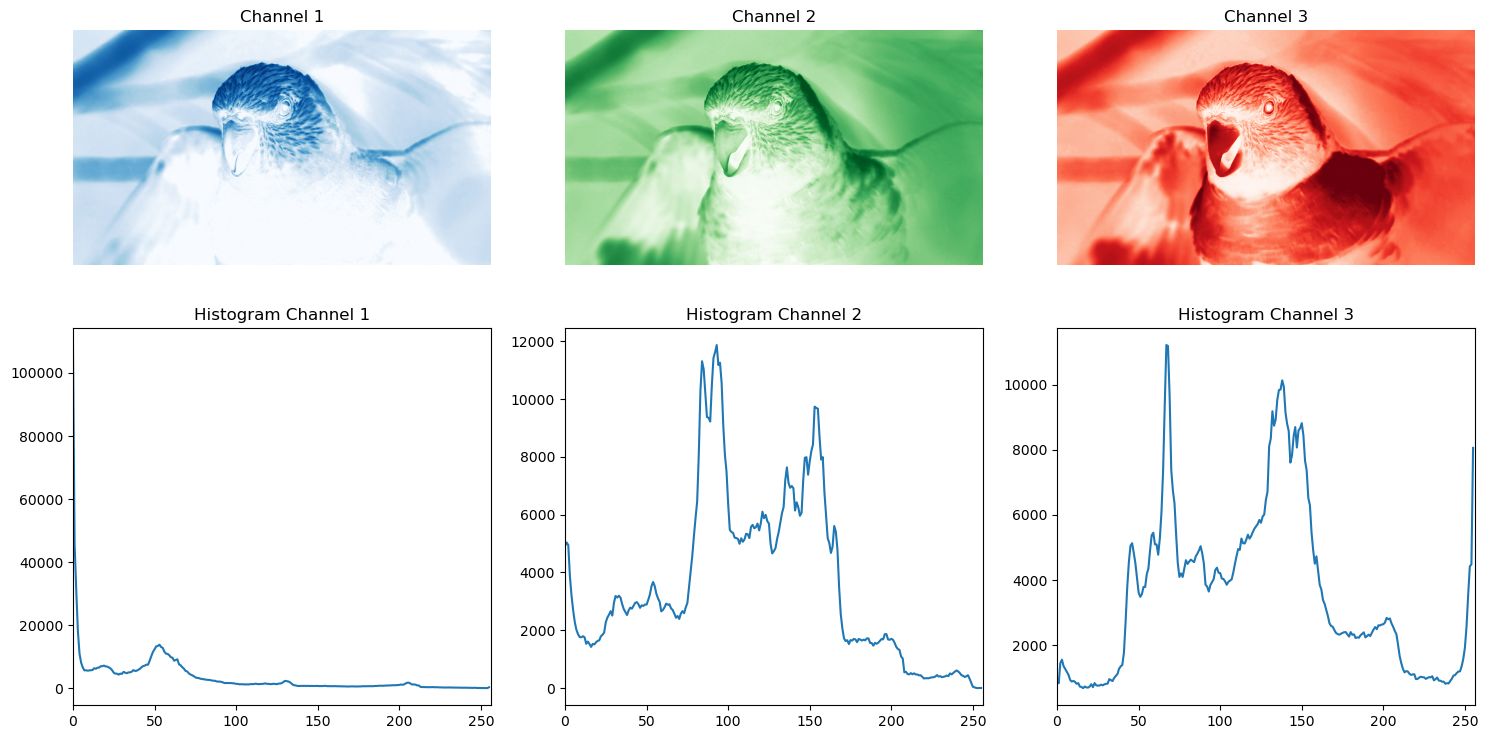

In [16]:
#split the image in different channels
chans = cv.split(img)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
colors = ["Blues", "Greens", "Reds"]
for i, (ch, col) in enumerate(zip(chans, colors)):
    #Visualize each channel separately
    ax = axes[0, i]
    ax.imshow(ch, cmap=col)
    ax.set_title(f'Channel {i + 1}')
    ax.axis('off')

    # Compute the histogram for each channel
    hist = cv.calcHist([ch], [0], None, [256], [0, 256])
    
    # Display the histogram under the corresponding image
    ax = axes[1, i]
    ax.plot(hist)
    ax.set_title(f'Histogram Channel {i+1}')
    ax.set_xlim([0, 256])
    
plt.tight_layout()
plt.show()

### Contrast Enhancement

THRESHOLD: [10880.4]
THRESHOLD: [1186.3]
THRESHOLD: [1121.9]


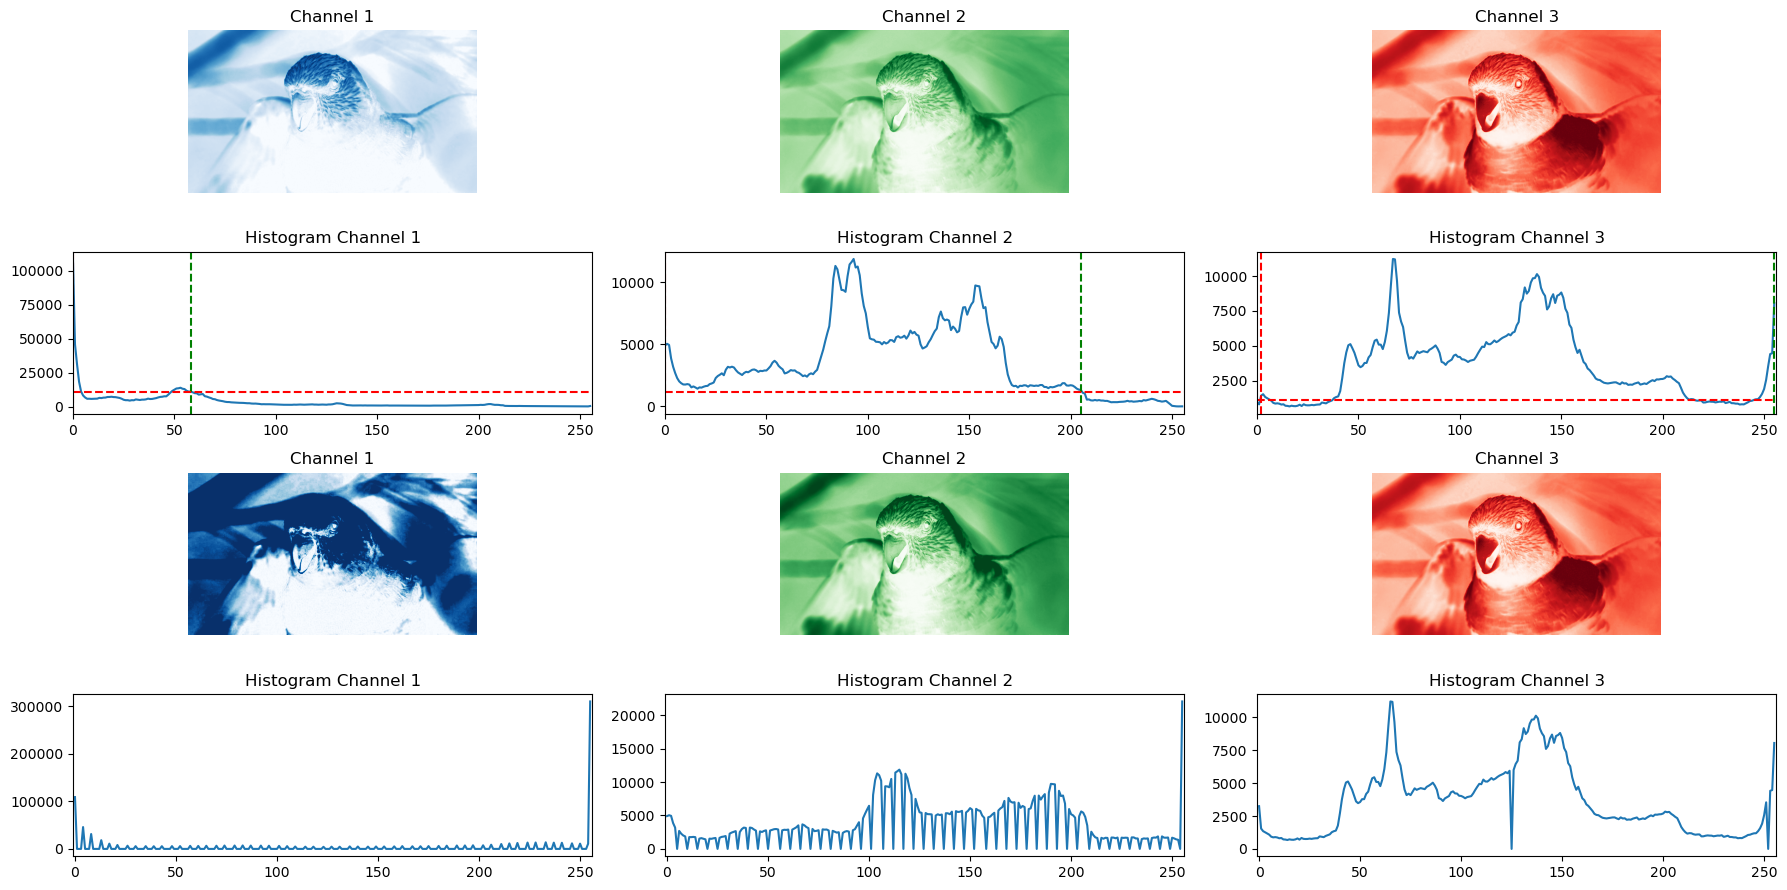

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 9))

p = 0.1 #input parameter

#loop on every channel
for i, (channel, col) in enumerate(zip(chans, colors)):
    #compute the histogramm for each channel
    hist = cv.calcHist([channel], [0], None, [256], [0, 256])
    
    #compute Lower and Higher thresholds according to the max/min value in the histogamm
    threshold = max(hist)*p
    print(f'THRESHOLD: {threshold}')
    
    #get the first bin of the histogramm whose data (pixel-intensity occurences) overcomes 
    #the minimum threshold
    for first in range(hist.size):
        if hist[first] > threshold:
            break;
            
    #get the last bin of the histogramm whose data (pixel-intensity occurences) overcomes 
    #the maximum threshold
    for last in range(255,-1,-1):
        if hist[last] > threshold:
            break;
    #define scaling and offset factors       
    if last == first:
        scale = 1
    else:
        scale = 255 / (last - first)
    offset = first
    
    #display original channels and corresponding histogramm
    ax = axes[0, i]
    ax.imshow(channel, cmap=col)
    ax.set_title(f'Channel {i + 1}')
    ax.axis('off')
    
    ax = axes[1, i]
    ax.plot(hist)
    ax.axvline(x=first, color='r', linestyle='--', label='Low Threshold')
    ax.axvline(x=last, color='g', linestyle='--', label='High Threshold')
    ax.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    
    ax.set_title(f'Histogram Channel {i+1}')
    ax.set_xlim([0, 256])
    
    #ACTIONS ON EACH SINGLE PIXEL FOR EACH CHANNEL
    #Clamp anything above and below the threshold to 0...255
    channel[channel < first] = 0
    channel[channel > last] = 255
    
    #Anything else is scaled
    channel[(channel >= first) & (channel <= last)] = channel[(channel >= first) & (channel <= last)] * scale - offset
    
    #revaluate the histogram
    hist = cv.calcHist([channel], [0], None, [256], [0, 256])
    
    #display new data
    ax = axes[2, i]
    ax.imshow(channel, cmap=col)
    ax.set_title(f'Channel {i + 1}')
    ax.axis('off')
    
    ax = axes[3, i]
    ax.plot(hist)
    ax.set_title(f'Histogram Channel {i+1}')
    ax.set_xlim([-1, 256])
    
plt.tight_layout()
plt.show()
    

(-0.5, 1279.5, 719.5, -0.5)

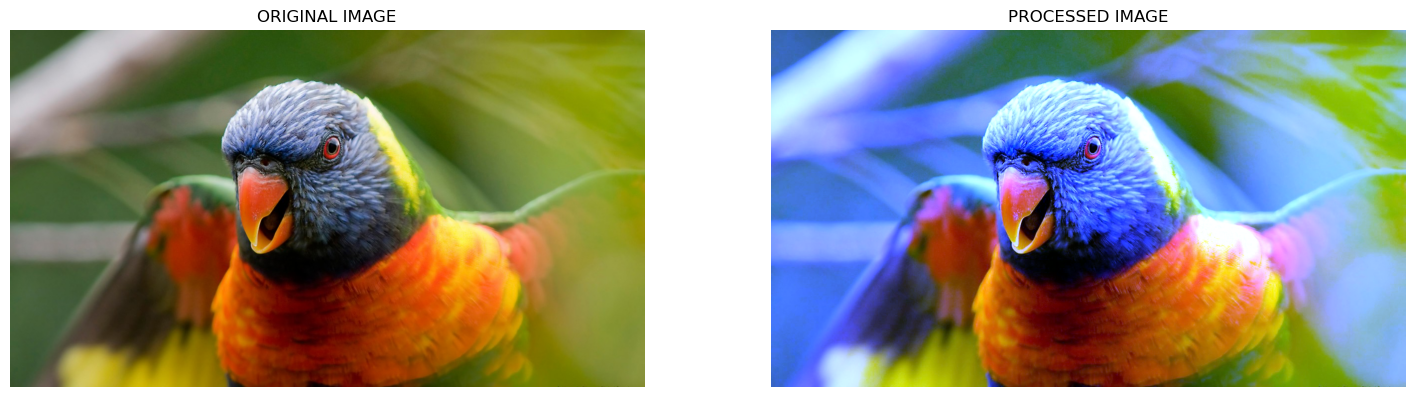

In [18]:
#combine togethere all the channels
merged_image = cv.merge([chans[0], chans[1], chans[2]])

#display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
ax = axes[0]
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax.set_title(f'ORIGINAL IMAGE')
ax.axis('off')
ax = axes[1]
ax.imshow(cv.cvtColor(merged_image, cv.COLOR_BGR2RGB))
ax.set_title(f'PROCESSED IMAGE')
ax.axis('off')


### Function Definition

In [22]:
def contrast_enh(img, p):
    chans = cv.split(img)
    for channel in chans:
        hist = cv.calcHist([channel], [0], None, [256], [0, 256])
        threshold = max(hist)*p
        
        for first in range(hist.size):
            if hist[first] > threshold:
                break;

        for last in range(255,-1,-1):
            if hist[last] > threshold:
                break;

        if last == first:
            den = 0.1
        else:
            den = last - first
            
        scale = 255 / den
        offset = first

        channel[channel < first] = 0
        channel[channel > last] = 255
        channel[(channel >= first) & (channel <= last)] = channel[(channel >= first) & (channel <= last)] * scale - offset
        
        final_image = cv.merge([chans[0], chans[1], chans[2]])
    
    return final_image

#### Testing

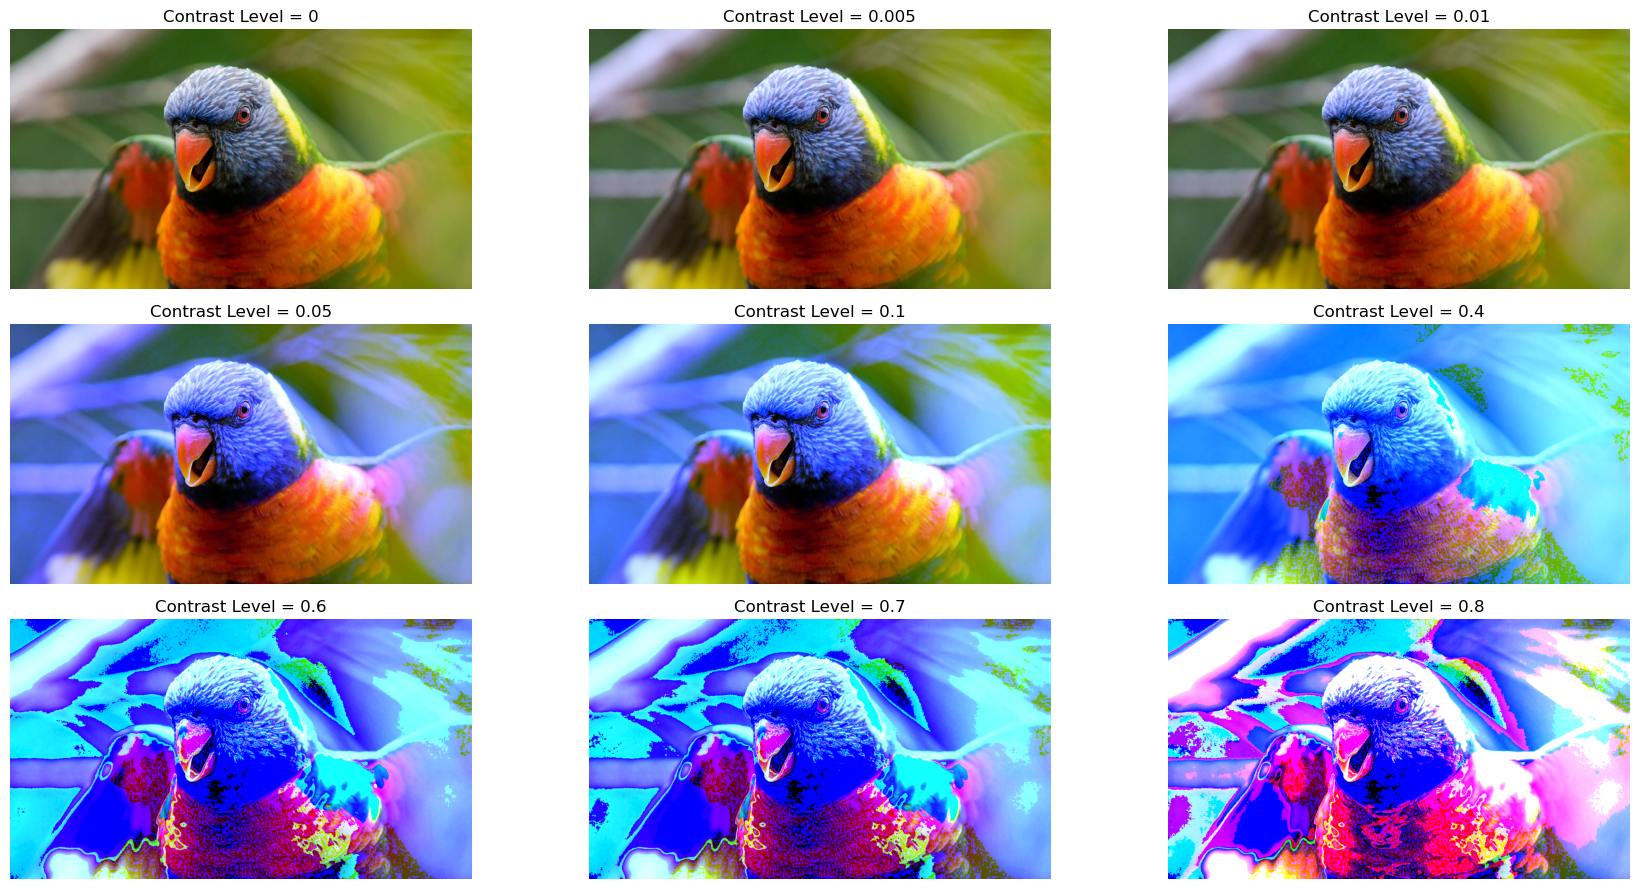

In [23]:
P = [0, 0.005, 0.01, 0.05, 0.1, 0.4, 0.6, 0.7, 0.8]
image = cv.imread(cv.samples.findFile("../inframes/parrot.png"))
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 9))
for i,p in enumerate(P):
    img = contrast_enh(image, p)
    ax = axes[i // 3, i % 3] 
    ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    ax.set_title(f'Contrast Level = {p}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Sharpener Filter Module

HEIGHT: 720
WIDTH: 1280
CHANNELS: 3


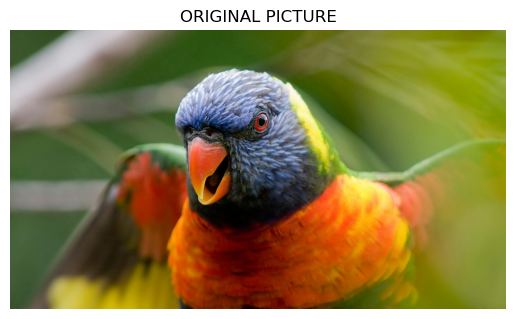

In [33]:
#read the image from the specified directory
img = cv.imread(cv.samples.findFile("../inframes/parrot.png"))

#check if the image has been loaded correctly
if img is None:
    sys.exit("Impossibile leggere l'immagine.")

#get information concerning image dimensions
height, width, n_ch = img.shape
print(f'HEIGHT: {height}\nWIDTH: {width}\nCHANNELS: {n_ch}')

#display image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('ORIGINAL PICTURE')
plt.axis('off')
plt.show()

(-0.5, 1279.5, 719.5, -0.5)

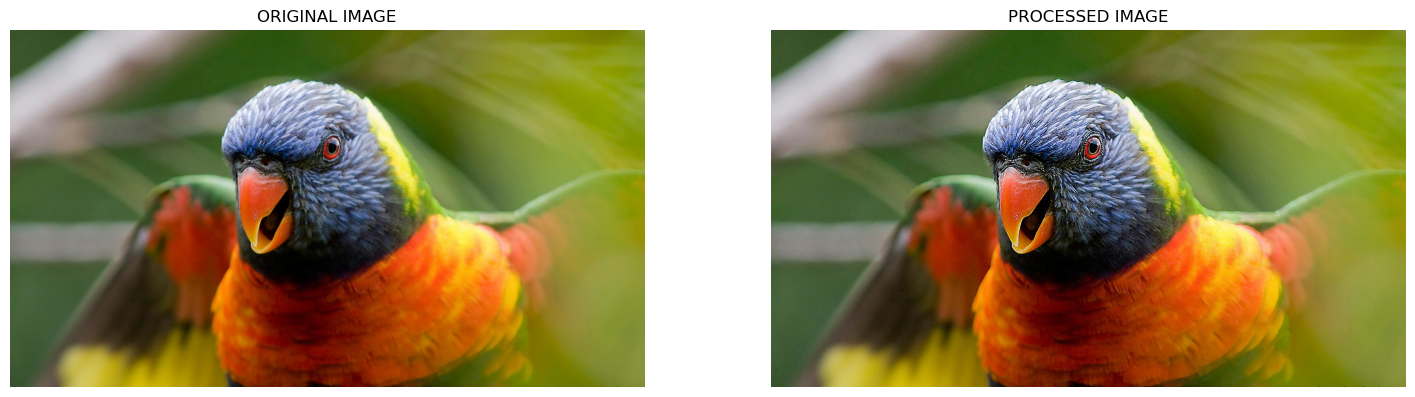

In [37]:
# Create a filter matrix
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply the filter matrix to the image
sharpened = cv.filter2D(img, -1, kernel)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
ax = axes[0]
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax.set_title(f'ORIGINAL IMAGE')
ax.axis('off')
ax = axes[1]
ax.imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB))
ax.set_title(f'PROCESSED IMAGE')
ax.axis('off')

In [42]:
def image_sharp(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

    # Apply the filter matrix to the image
    sharpened = cv.filter2D(image, -1, kernel)
    
    return sharpened

(-0.5, 1279.5, 719.5, -0.5)

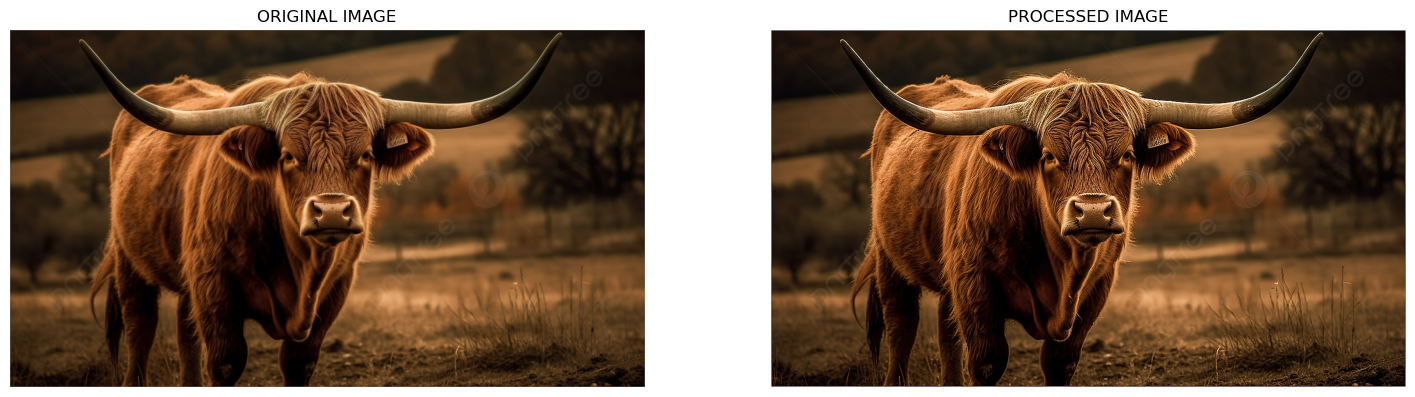

In [44]:
imm = cv.imread(cv.samples.findFile("../inframes/cow.png"))
cow = image_sharp(imm)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
ax = axes[0]
ax.imshow(cv.cvtColor(imm, cv.COLOR_BGR2RGB))
ax.set_title(f'ORIGINAL IMAGE')
ax.axis('off')
ax = axes[1]
ax.imshow(cv.cvtColor(cow, cv.COLOR_BGR2RGB))
ax.set_title(f'PROCESSED IMAGE')
ax.axis('off')